# PART OF THE TEMPLATE

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from dpp.data import load_from_kaggle

In [5]:
dataset_link = "sulianova/cardiovascular-disease-dataset" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

100%|██████████| 742k/742k [00:00<00:00, 1.43MB/s]

Extracting files...
Loading dataset from C:\Users\Eyyub\.cache\kagglehub\datasets\sulianova\cardiovascular-disease-dataset\versions\1 to ../data/raw\cardiovascular-disease-dataset
Moving file: C:\Users\Eyyub\.cache\kagglehub\datasets\sulianova\cardiovascular-disease-dataset\versions\1\cardio_train.csv to c:\Users\Eyyub\Desktop\StackFuel\PortfolioProjekt\DPP-Stackfuel-Data-Science-Projekt\notebooks\../data/raw\cardiovascular-disease-dataset
Files moved to '../data/raw\cardiovascular-disease-dataset' directory.


In [6]:
files

['cardio_train.csv']

In [8]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]), delimiter=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2),
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(70000, 13)

'Description'

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.0,70000.0
mean,49972.42,19468.87,1.35,164.36,74.21,128.82,96.63,1.37,1.23,0.09,0.05,0.8,0.5
std,28851.30,2467.25,0.48,8.21,14.40,154.01,188.47,0.68,0.57,0.28,0.23,0.4,0.5
min,0.00,10798.00,1.00,55.00,10.00,-150.00,-70.00,1.00,1.00,0.00,0.00,0.0,0.0
25%,25006.75,17664.00,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
50%,50001.50,19703.00,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
75%,74889.25,21327.00,2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.0
max,99999.00,23713.00,2.00,250.00,200.00,16020.00,11000.00,3.00,3.00,1.00,1.00,1.0,1.0


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
id,int64,0,70000,"[25320, 51317, 96886]"
age,int64,0,8076,"[16050, 18158, 17586]"
gender,int64,0,2,"[1, 2, 2]"
height,int64,0,109,"[165, 164, 150]"
weight,float64,0,287,"[200.0, 79.0, 65.0]"
ap_hi,int64,0,153,"[100, 140, 140]"
ap_lo,int64,0,157,"[80, 90, 70]"
cholesterol,int64,0,3,"[1, 1, 1]"
gluc,int64,0,3,"[1, 1, 1]"
smoke,int64,0,2,"[0, 0, 0]"


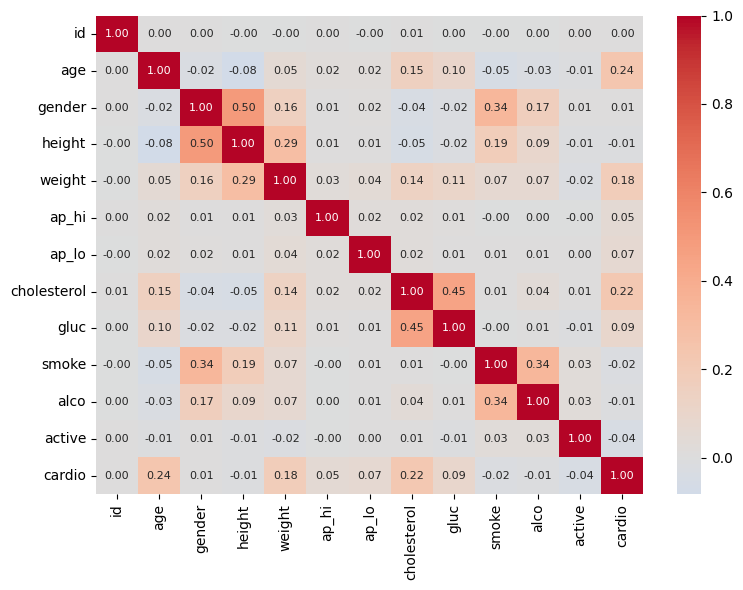

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0,
            annot_kws={"size": 8}, fmt='.2f')  # Kleinere Schrift + 2 Dezimalstellen
plt.tight_layout()
plt.show()

# ===========================================

# ===========================================

#  OWN PART BEGINS HERE

# Exploration of Data

## Imports

In [25]:
# =============================================================================
# 1. IMPORTS & SETUP
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configuration
warnings.filterwarnings('ignore')
#plt.style.use('seaborn-v0_8')
#sns.set_palette("husl")

# Plot settings
#plt.rcParams['figure.figsize'] = (12, 8)
#plt.rcParams['font.size'] = 11

## Load Data & Initial Inspection

In [26]:
# =============================================================================
# 2. DATA LOADING & INITIAL INSPECTION
# =============================================================================

# Load dataset (adjust path as needed)
dataset_link = "sulianova/cardiovascular-disease-dataset" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]), sep=";")

print(f"Dataset loaded: {df.shape[0]:,} rows, {df.shape[1]} columns")
print("\n" + "="*60)

# Display first 5 rows
print("First 5 rows:")
display(df.head())

Destination directory '../data/raw\cardiovascular-disease-dataset' already exists with files. Skipping download (replace=False).
Dataset loaded: 70,000 rows, 13 columns

First 5 rows:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [27]:
# Basic information
print("DATASET INFO:")
print("="*40)
df.info()

print("\nSHAPE:")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")

DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB

SHAPE:
Rows: 70,000
Columns: 13


In [28]:
# Column names and data types
print("COLUMNS & DATA TYPES:")
print("="*40)
for col in df.columns:
    print(f"{col:15} | {str(df[col].dtype):10} | Unique: {df[col].nunique():4}")

COLUMNS & DATA TYPES:
id              | int64      | Unique: 70000
age             | int64      | Unique: 8076
gender          | int64      | Unique:    2
height          | int64      | Unique:  109
weight          | float64    | Unique:  287
ap_hi           | int64      | Unique:  153
ap_lo           | int64      | Unique:  157
cholesterol     | int64      | Unique:    3
gluc            | int64      | Unique:    3
smoke           | int64      | Unique:    2
alco            | int64      | Unique:    2
active          | int64      | Unique:    2
cardio          | int64      | Unique:    2


## Missing Values & Data Quality

In [29]:
# =============================================================================
# 3. MISSING VALUES & DATA QUALITY
# =============================================================================

print("MISSING VALUES ANALYSIS:")
print("="*40)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percent': (df.isnull().sum() / len(df)) * 100
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_data) > 0:
    display(missing_data)
else:
    print("No missing values found!")

MISSING VALUES ANALYSIS:
No missing values found!


In [30]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"DUPLICATES: {duplicates:,} ({duplicates/len(df)*100:.2f}%)")

if duplicates > 0:
    print("Duplicates found - should be handled in preprocessing")

DUPLICATES: 0 (0.00%)


## Target Variable Analysis